# Support Vector Machines (SMV)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from IPython.display import HTML
from IPython.display import display

warnings.filterwarnings('ignore')

#%matplotlib ipympl # Interactive mode
%matplotlib inline

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Importing neccesary libraries. <a href="javascript:code_toggle()">--></a>''')
display(tag)

### Generating the dataset

Dataset (x)
           0         1
0 -0.070093  0.042748
1  0.053386 -0.103213
2 -0.465971 -1.066877
3 -0.199720  0.070763
4  0.256126  0.022058 

Target (y)
 0    1
1    1
2    0
3    1
4    1
dtype: int64 

Plotting the dataset


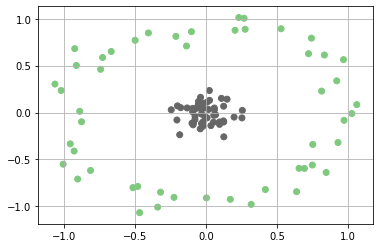

In [2]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

x, y = make_circles(n_samples=100,
                  factor=0.1,
                  noise=0.1,
                  random_state=1)

print('Dataset (x)' + '\n', pd.DataFrame(x).head(), '\n')
print('Target (y)' + '\n', pd.Series(y).head(), '\n')
print('Plotting the dataset')

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Accent')
plt.grid()
plt.show()

### Fitting the model

In [3]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.close('Figure 1')

model = SVC().fit(x,y)

print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


### Create a function to define the edge of the classifier

In [4]:
def SVC_separator(x, y, model, name_model):
    def plot_svm_separator(model, x, y, name_model):
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
        xx = np.linspace(x_min, x_max, 10)
        yy = np.linspace(y_min, y_max, 10)
    
        X1, X2 = np.meshgrid(xx, yy)
        z = np.empty(X1.shape)
    
        for (i, j), val in np.ndenumerate(X1):
            x1 = val
            x2 = X2[i, j]
            p = model.decision_function(np.array([[x1, x2]]))
            z[i, j] = p[0]
        
        levels = [-1.0, 0, 1.0]
        linestyles = ['dashed', 'solid', 'dashed']
        colors = 'k'
    
        plt.contour(X1, X2, z, levels, colors=colors, 
                    linestyles=linestyles)
        plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Accent')
        plt.show()

    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    
    for i in range(len(kernels)):
        model = SVC(kernel=kernels[i]).fit(x, y)
        plt.subplot(2, 2, 1 + i)
        plot_svm_separator(model, x, y, 'SVM')
        plt.title(kernels[i])
        plt.show()
                    
    print('The model is ', name_model)

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

### Using our model to create predictions

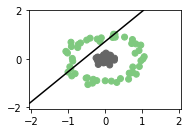

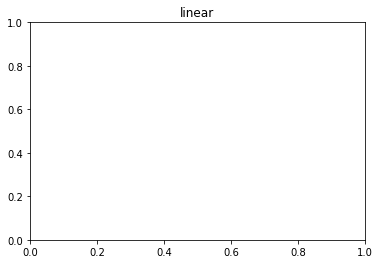

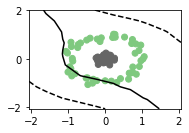

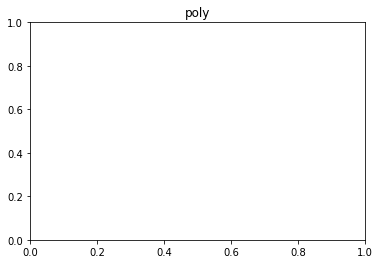

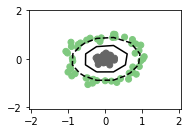

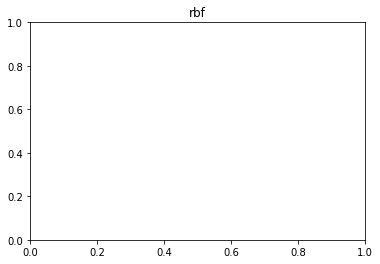

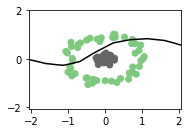

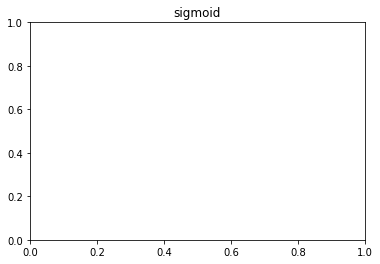

The model is  SVC

Predicted Values
 0    1
1    1
2    0
3    1
4    1
dtype: int64


In [5]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasdsa. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.figure()
SVC_separator(x, y, model, 'SVC')

predict = model.predict(x)

print('\n' + 'Predicted Values' + '\n', pd.Series(predict).head())

### Model Accuracy

In [6]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.close('Figure 2')

accu_SVC = accuracy_score(y, predict)
print('La precision del modelo es ', round(accu_SVC, 2))

La precision del modelo es  1.0
